# Base Ball Analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


## Exploratory Data Analysis

In [5]:
print('The shape of the dataset is ',df.shape)

The shape of the dataset is  (30, 17)


In [6]:
print('The columns of the dataset are ',df.columns)

The columns of the dataset are  Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')


In [7]:
print('The number of duplicated values in the dataset are ',df.duplicated().sum())

The number of duplicated values in the dataset are  0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
print('The number of null values in the dataset are ',df.isnull().sum())

The number of null values in the dataset are  W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


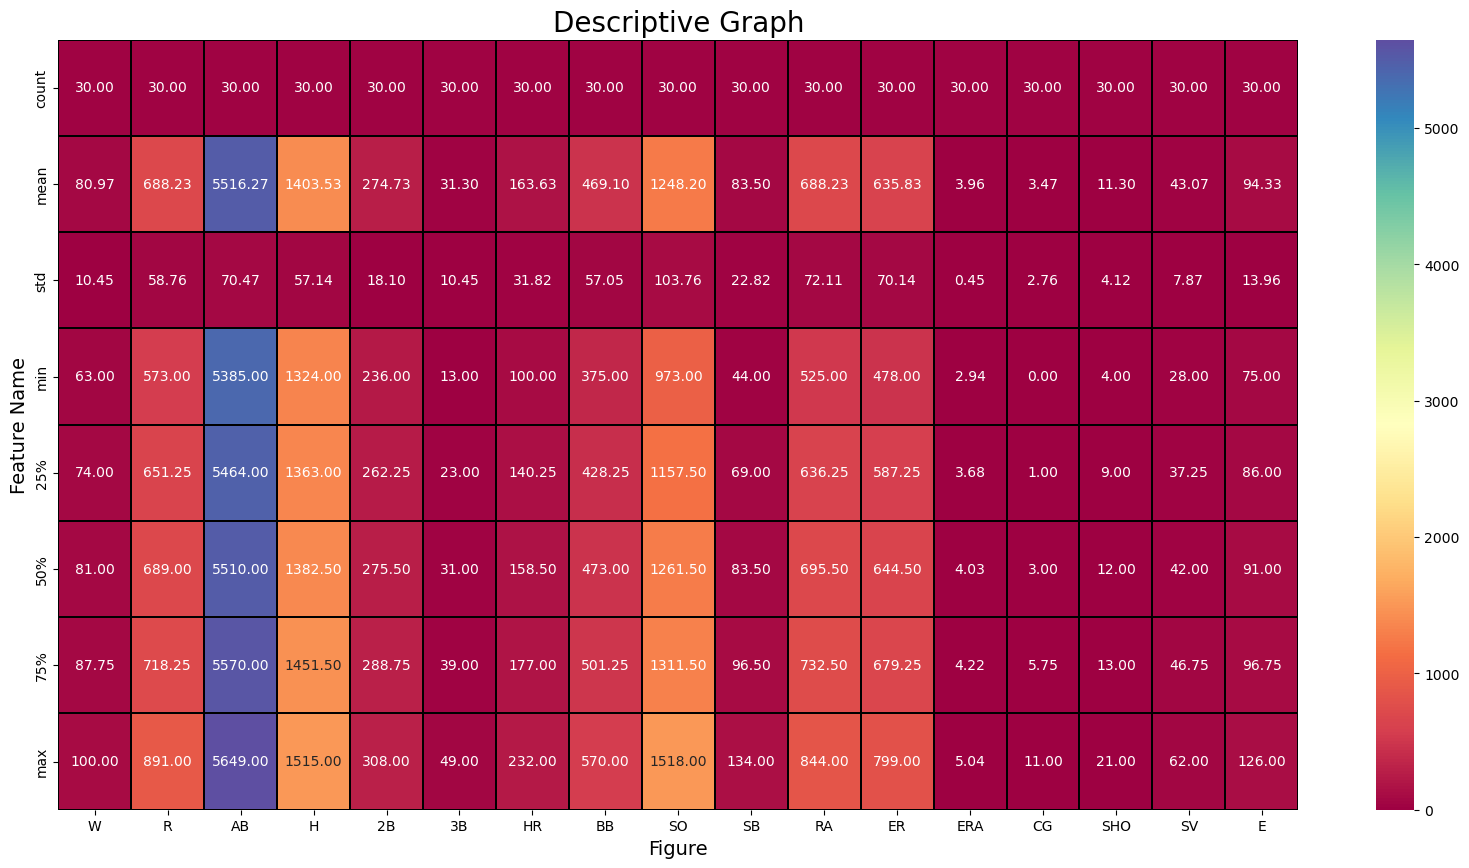

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.1,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Feature Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

## Data Visualization

<AxesSubplot:>

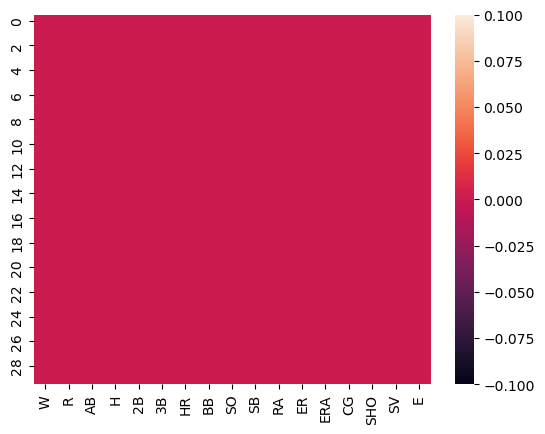

In [22]:
sns.heatmap(df.isnull())

## Bi Variate Analysis

<AxesSubplot:xlabel='W', ylabel='R'>

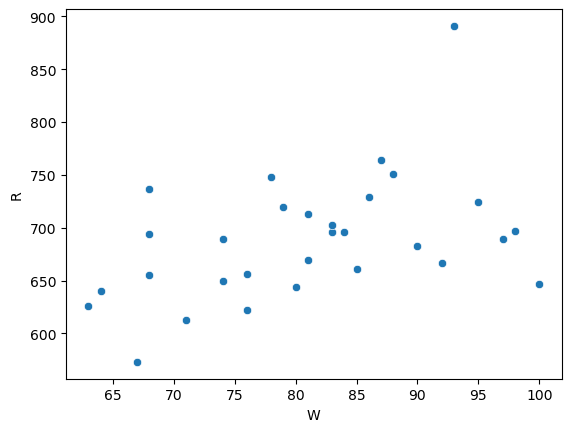

In [23]:
sns.scatterplot(x='W',y='R',data=df)

<AxesSubplot:xlabel='W', ylabel='AB'>

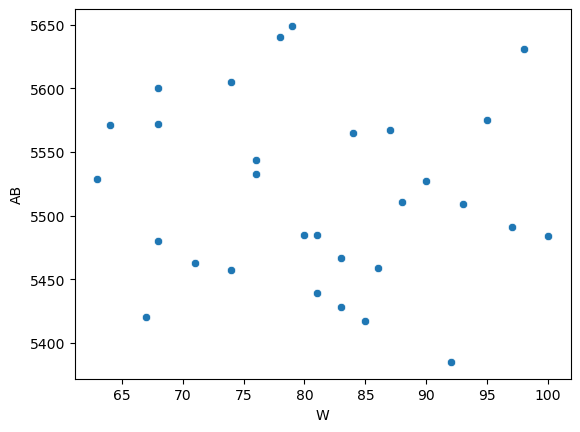

In [24]:
sns.scatterplot(x='W',y='AB',data=df)

<AxesSubplot:xlabel='W', ylabel='H'>

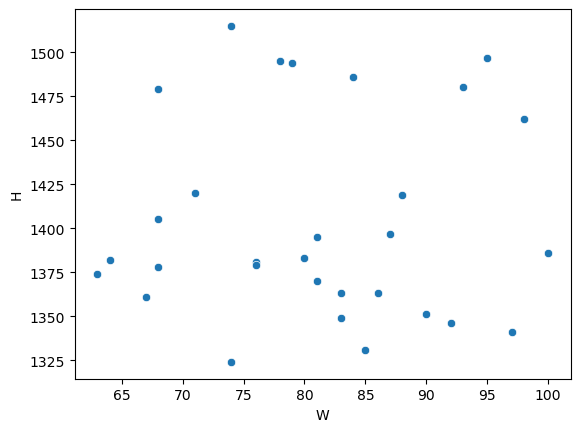

In [25]:
sns.scatterplot(x='W',y='H',data=df)

<AxesSubplot:xlabel='AB', ylabel='R'>

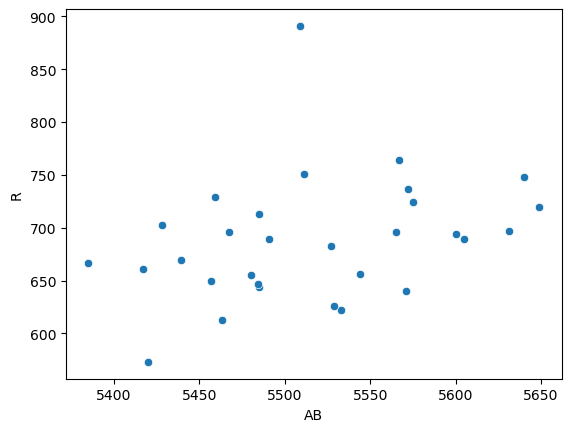

In [26]:
sns.scatterplot(x='AB',y='R',data=df)

<AxesSubplot:xlabel='W', ylabel='SO'>

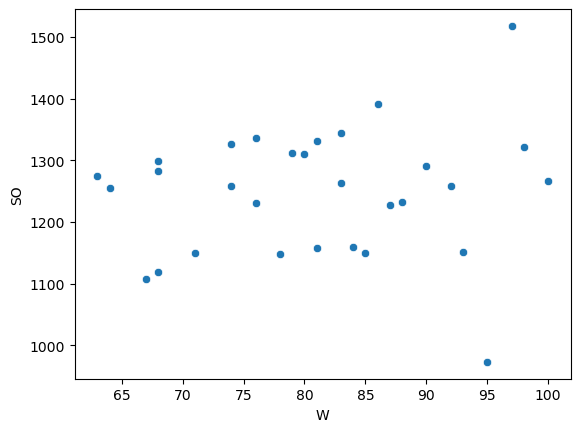

In [27]:
sns.scatterplot(x='W',y='SO',data=df)

## Multi Variate Analysis

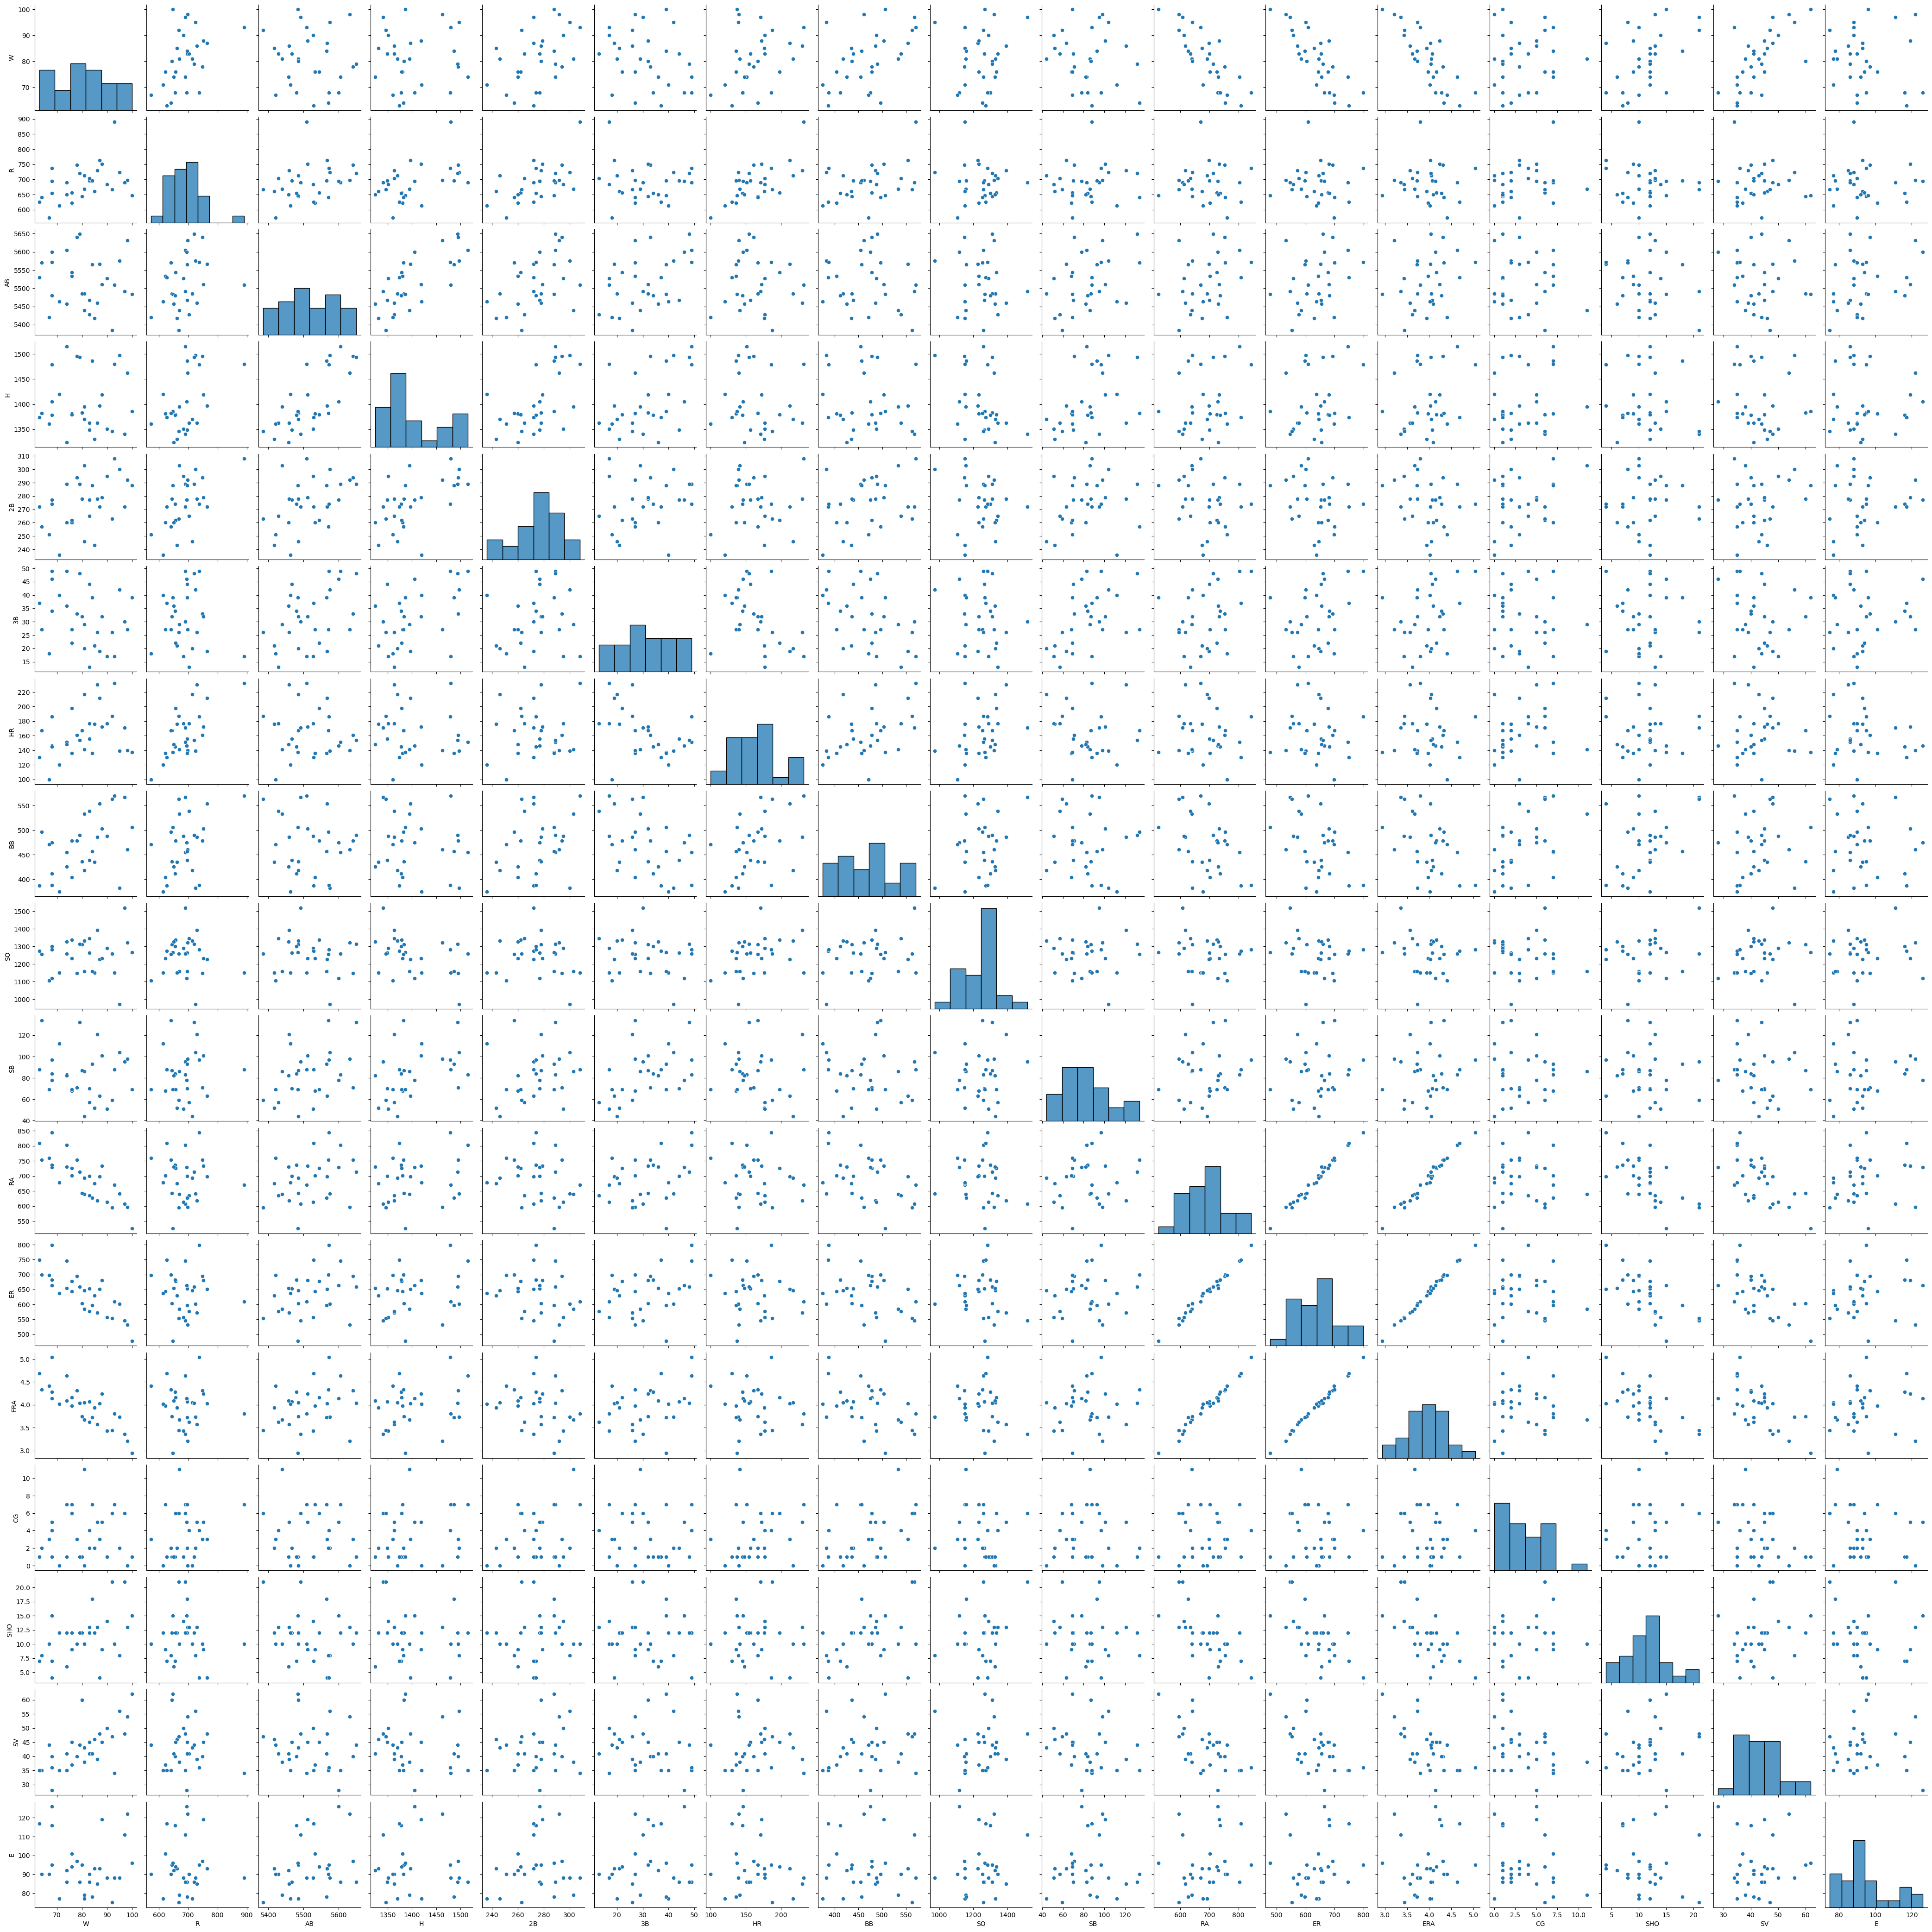

In [28]:
sns.pairplot(df)

## Detecting Outliers

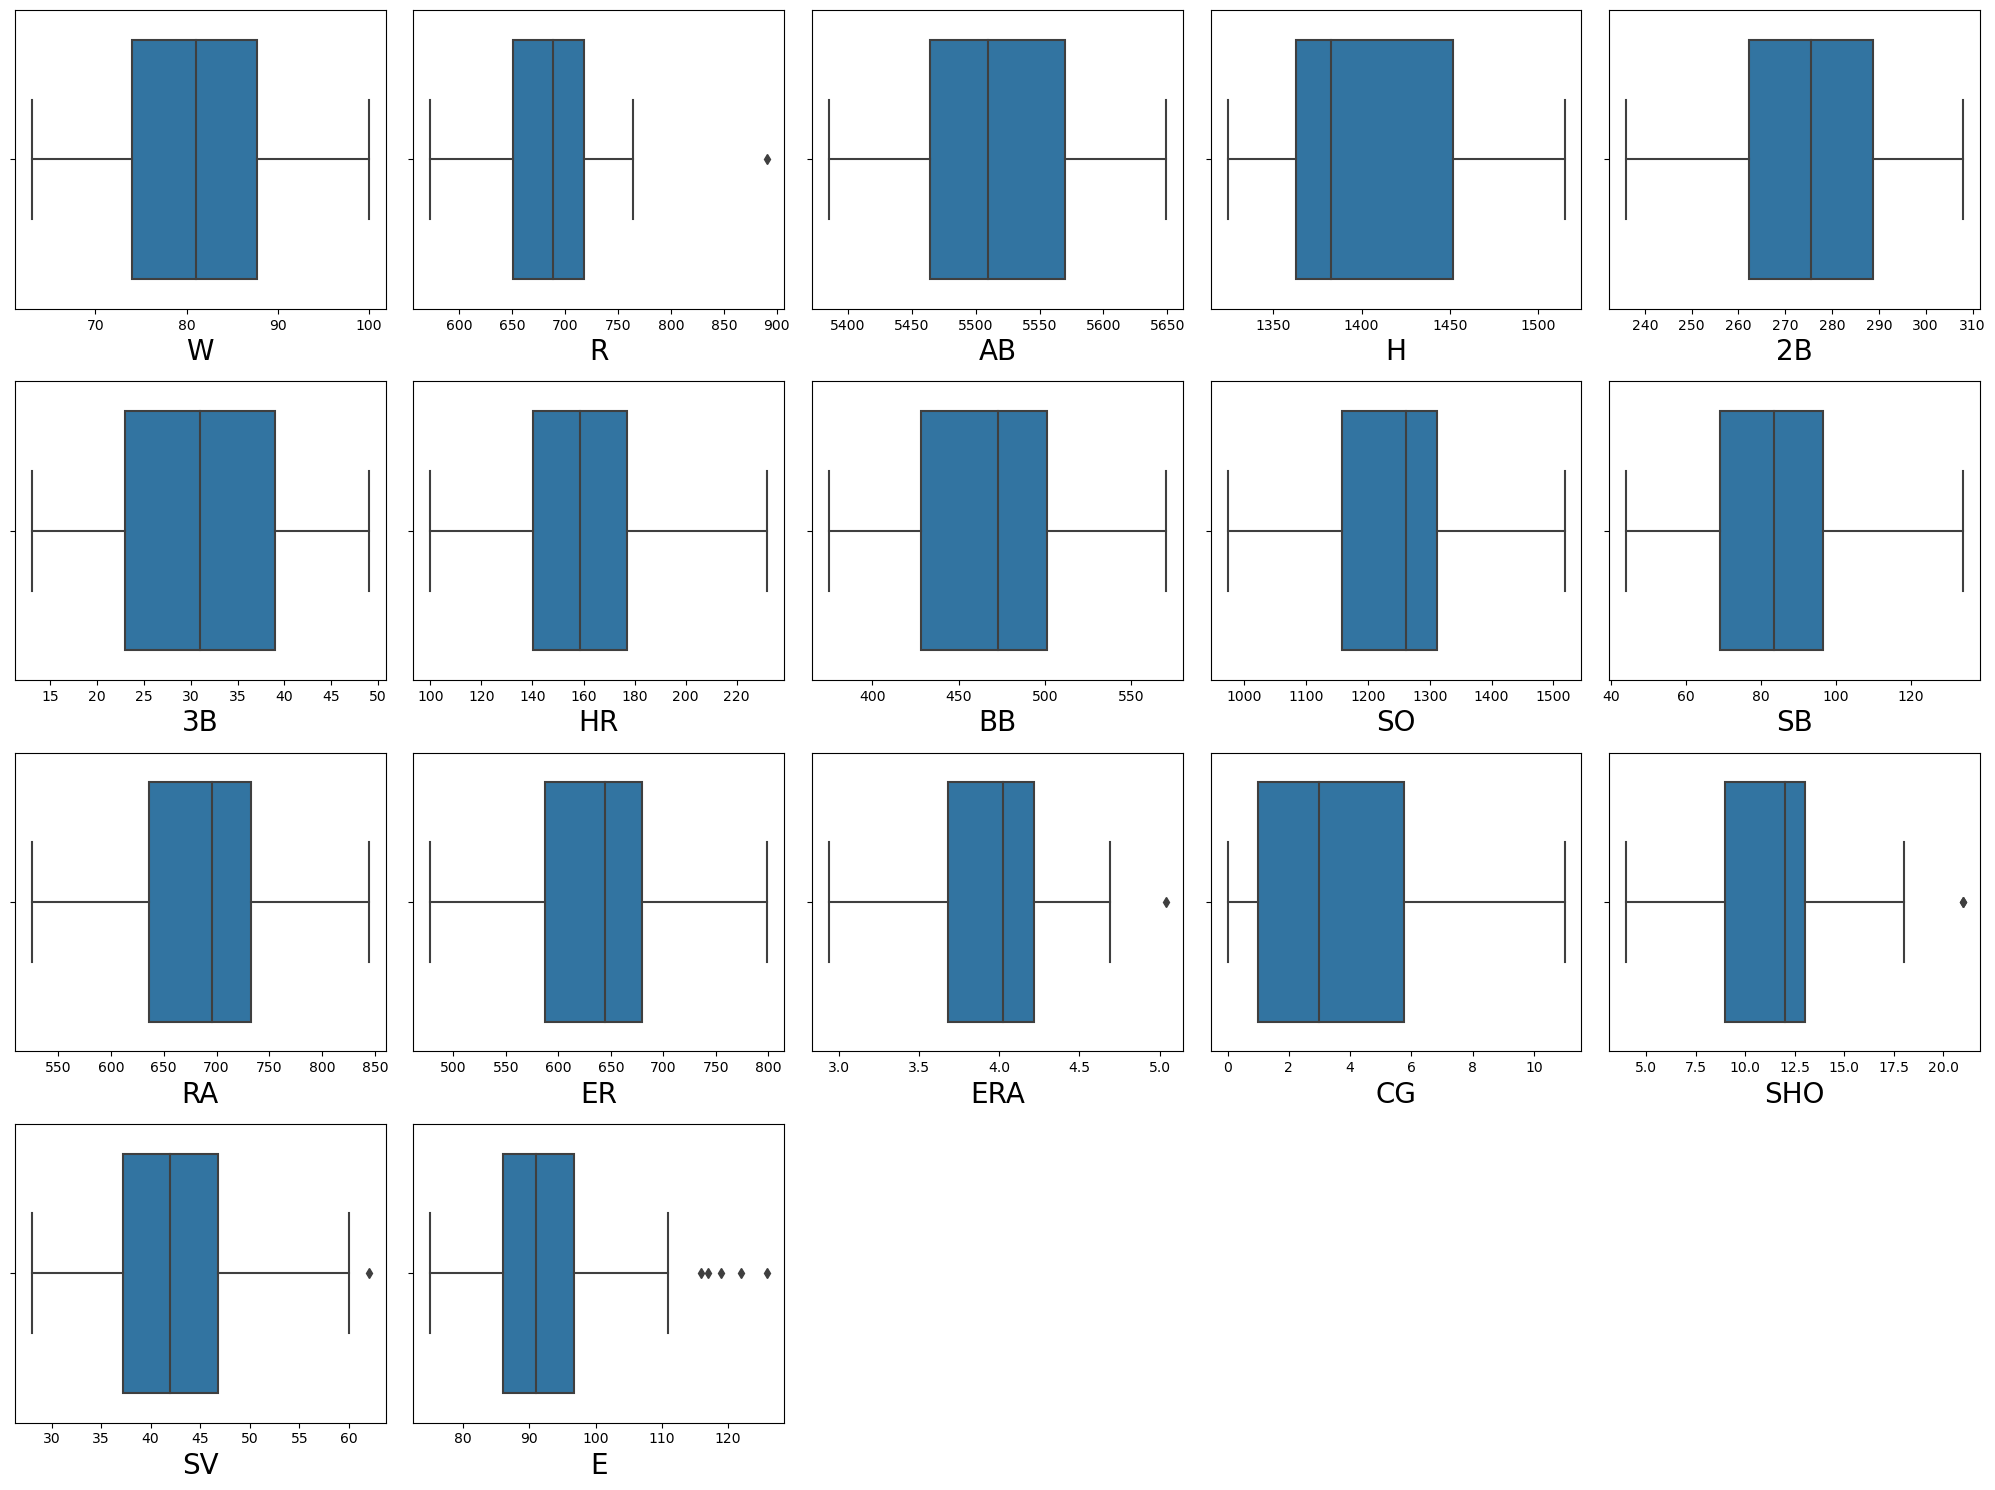

In [29]:
plt.figure(figsize=(20,15))
p=1
for col in df:
    if p<=20:
        ax=plt.subplot(4,5,p)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    p+=1
    
plt.tight_layout()

## Detecting Skewness 

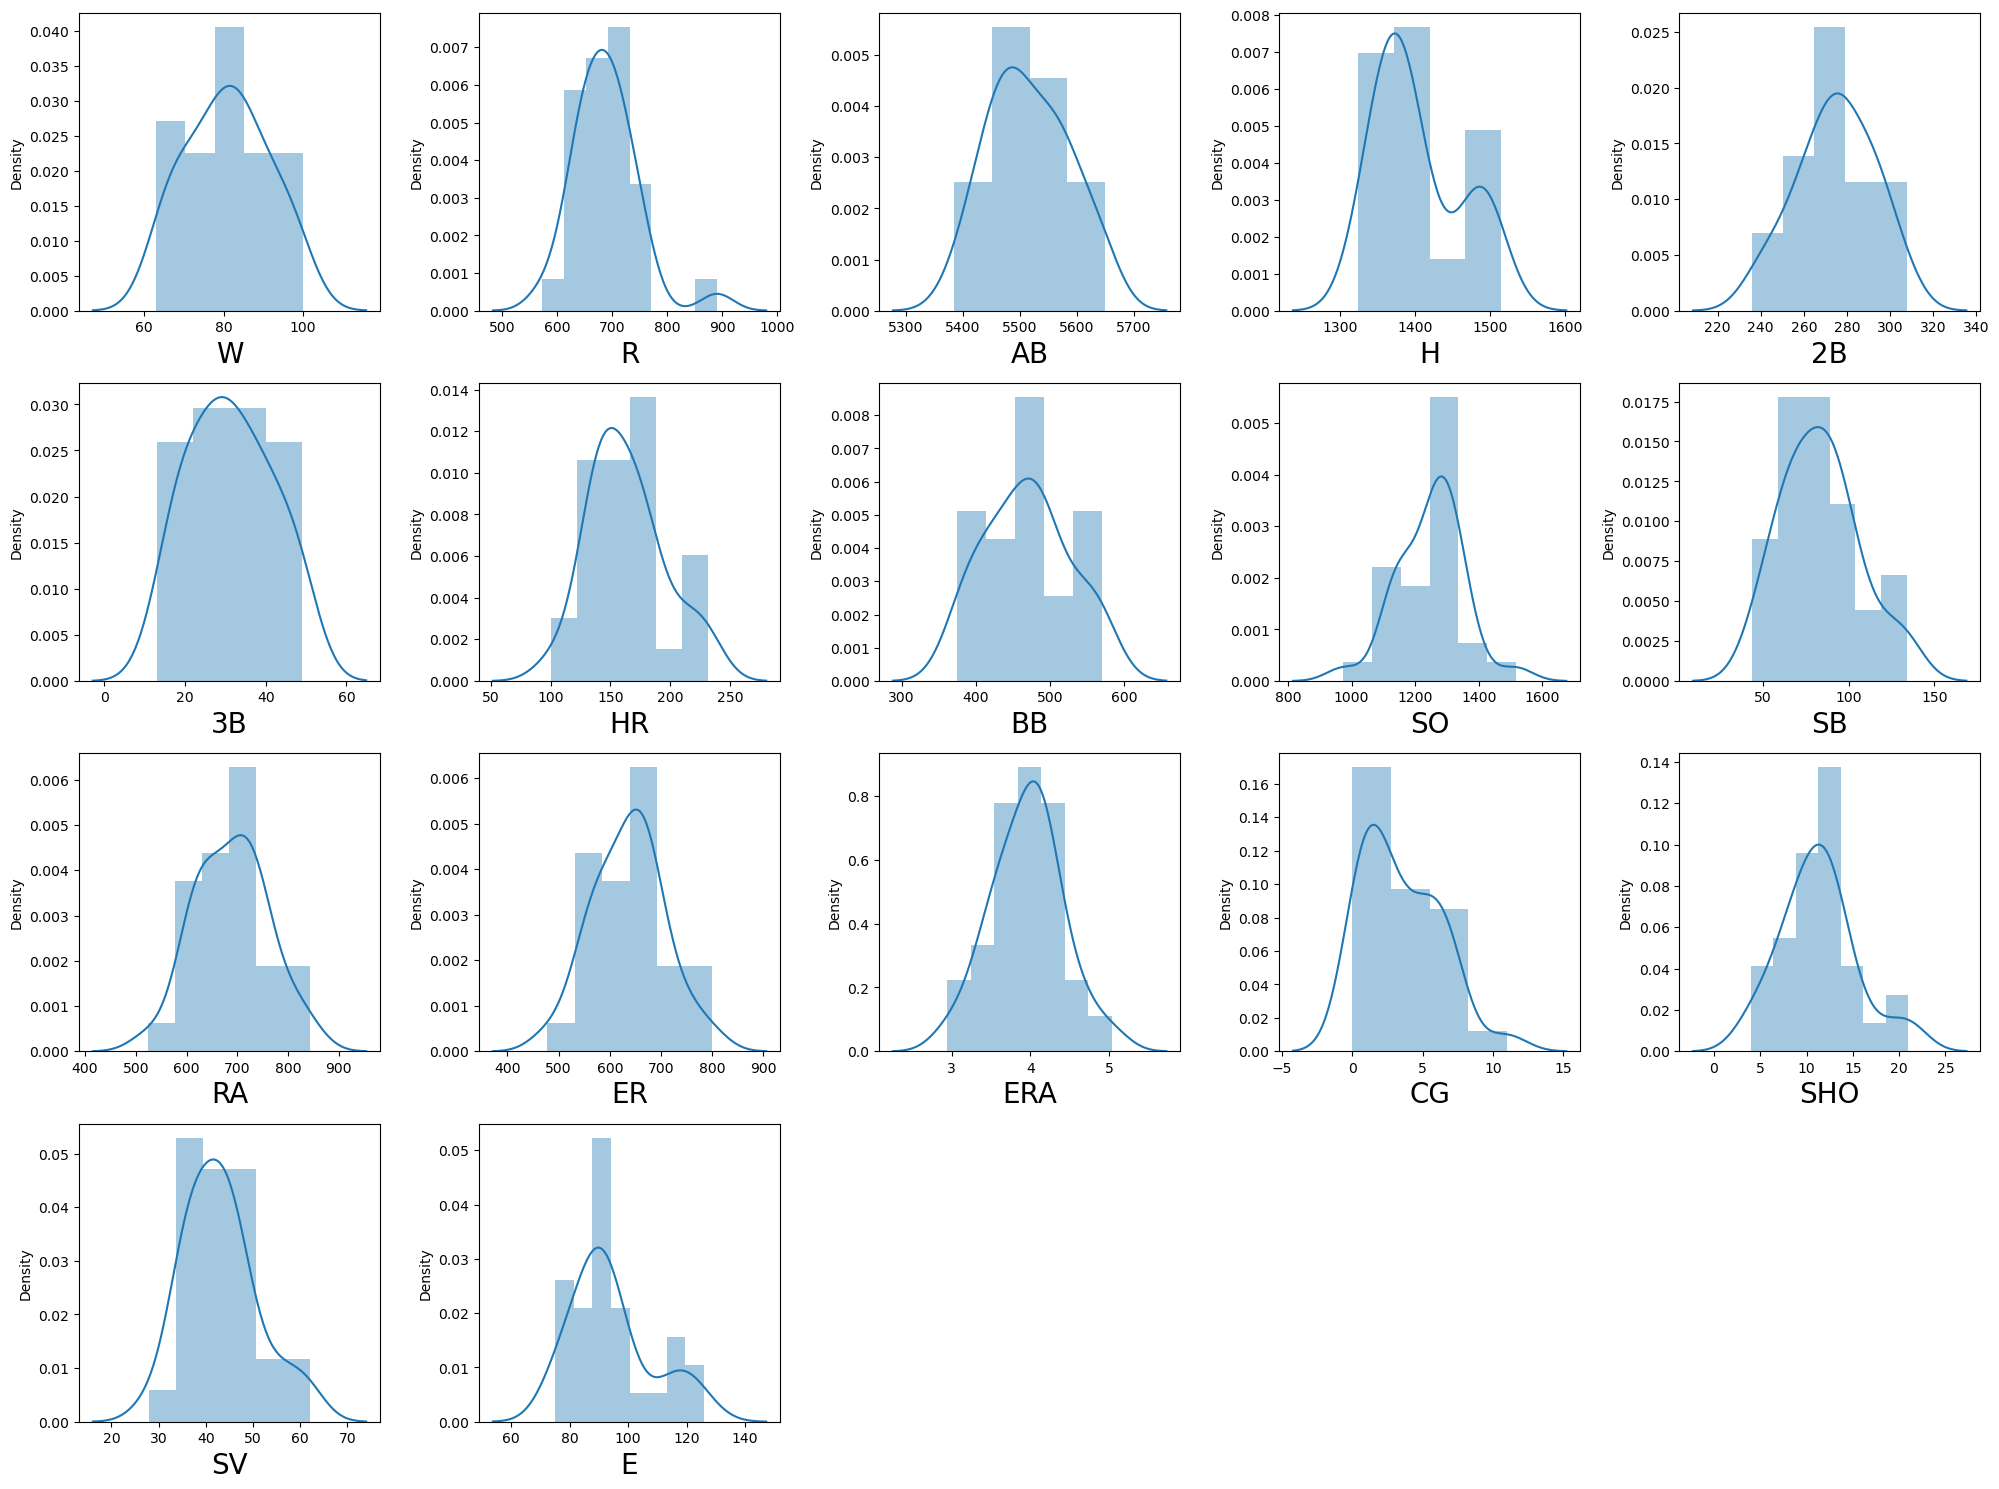

In [33]:
plt.figure(figsize=(20,15))
p=1
for col in df:
    if p<=20:
        ax=plt.subplot(4,5,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    p+=1
    
plt.tight_layout()

In [104]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

No skewness found in this dataset

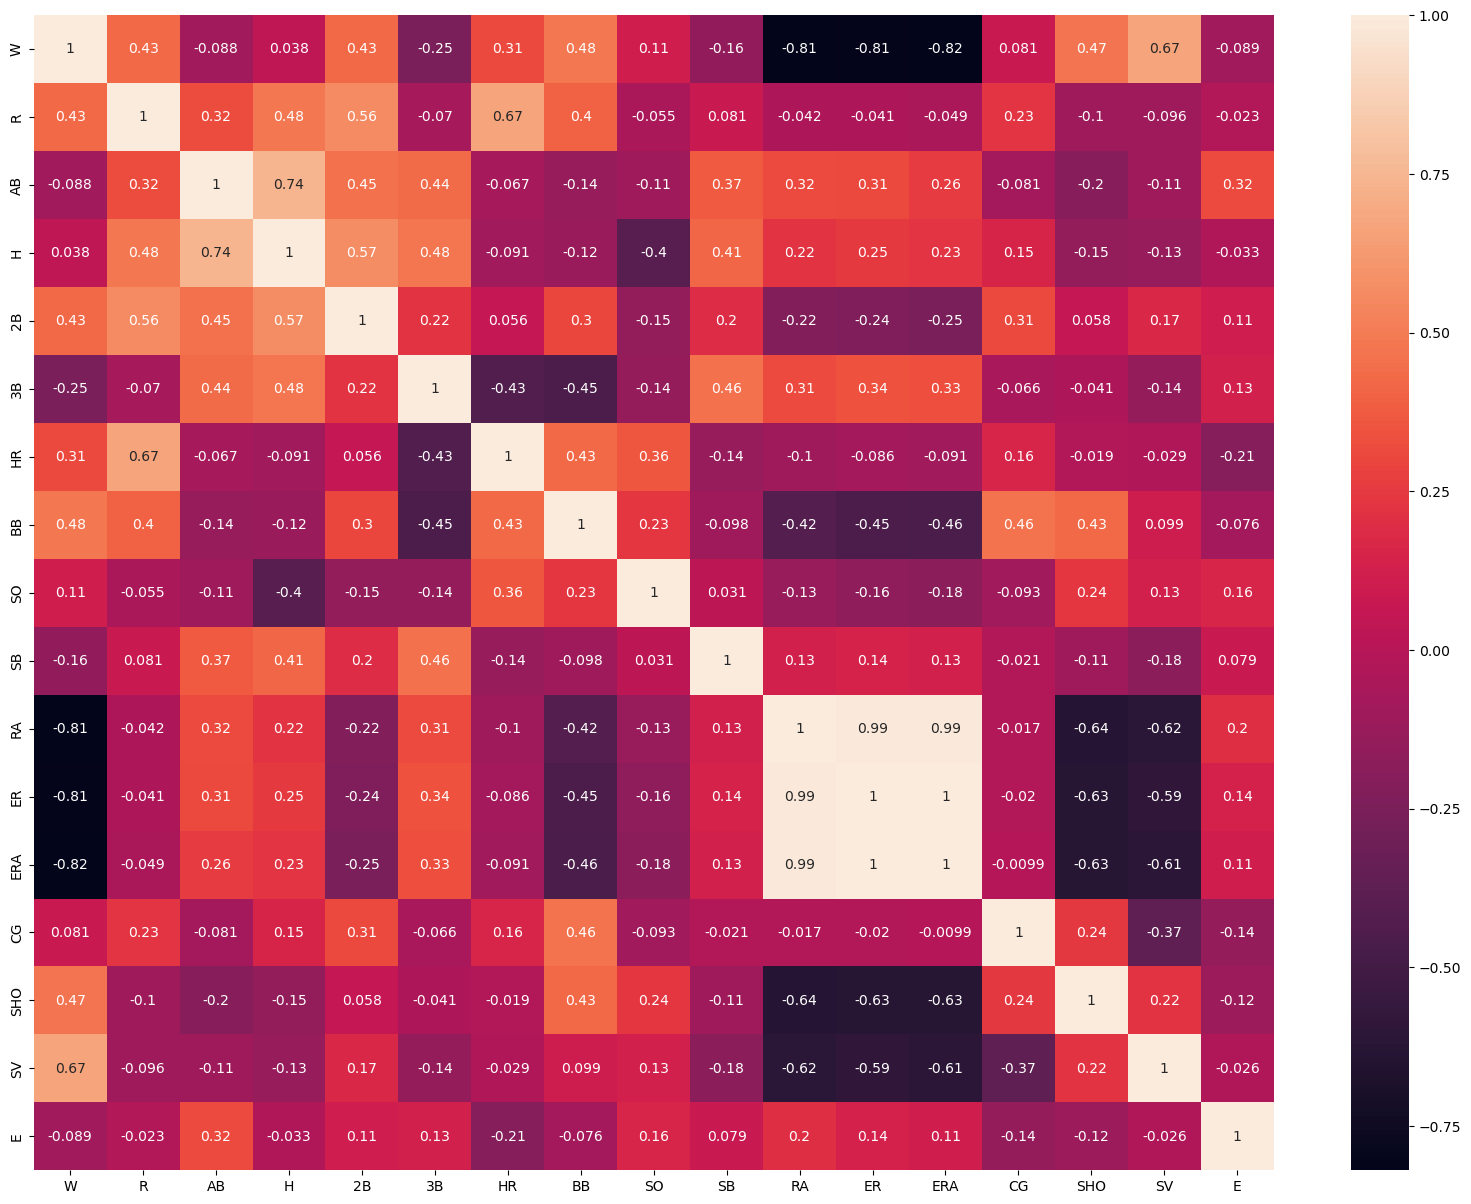

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Feature Selection

In [35]:
x=df.drop('W',axis=1)
y=df['W']

In [37]:
x.shape,y.shape

((30, 16), (30,))

## Data Preprocessing

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Values
0,R,11.522370
1,AB,13.311532
2,H,10.070668
3,2B,4.019297
4,3B,3.294146
5,HR,10.079902
6,BB,3.806098
7,SO,2.652401
8,SB,2.102684
9,RA,191.839155


In [43]:
x1=x.drop('ER',axis=1)

In [44]:
Vif=pd.DataFrame()
Vif['Features']=x1.columns
Vif['Values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
Vif

,Features,Values
0,R,11.158733
1,AB,5.863764
2,H,9.628749
3,2B,3.786446
4,3B,3.293109
5,HR,9.057309
6,BB,3.791451
7,SO,2.607389
8,SB,1.849280
9,RA,122.133235


In [45]:
X=x1.drop('RA',axis=1)

In [46]:
Vif=pd.DataFrame()
Vif['Features']=X.columns
Vif['Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
Vif

,Features,Values
0,R,10.987898
1,AB,4.399954
2,H,8.941874
3,2B,3.729413
4,3B,3.142717
5,HR,7.882841
6,BB,3.468244
7,SO,2.155496
8,SB,1.819823
9,ERA,4.951981


* ER and RA has multicollinearity. So it is removed from the table.

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

## Finding Best random state for building models

In [53]:
maxAcc=0
maxRS=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        
print('Max R2 Score is',acc)
print('Best Random State is',maxRs)

Max R2 Score is 0.5549821575538185
Best Random State is 6


In [81]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=327)

In [82]:
print('Size of x_train:',x_train.shape)
print('Size of x_test:',x_test.shape)
print('Size of y_train:',y_train.shape)
print('Size of y_test:',y_test.shape)

Size of x_train: (21, 14)
Size of x_test: (9, 14)
Size of y_train: (21,)
Size of y_test: (9,)


In [83]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=327)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    MAE=mean_absolute_error(y_test,pred)
    print('The Mean Absolute Error ',MAE)
    MSE=mean_squared_error(y_test,pred)
    print('The Mean Squared Error ',MSE)
    Accuracy_Score=r2_score(y_test,pred)*100
    print('R2 Score ',Accuracy_Score)

## Linear Regression

In [84]:
clf=LinearRegression()
classify(clf,X,y)

The Mean Absolute Error  2.5911708520877914
The Mean Squared Error  11.956735174018458
R2 Score  86.07683224417057


## Decision Tree Regressor

In [85]:
clf=DecisionTreeRegressor()
classify(clf,X,y)

The Mean Absolute Error  6.0
The Mean Squared Error  50.22222222222222
R2 Score  41.518113858539394


## Random Forest Regressor

In [86]:
clf=RandomForestRegressor()
classify(clf,X,y)

The Mean Absolute Error  4.5988888888888875
The Mean Squared Error  27.44981111111109
R2 Score  68.03572886716506


## Gradient Boosting Regressor

In [87]:
clf=GradientBoostingRegressor()
classify(clf,X,y)

The Mean Absolute Error  4.127506870484625
The Mean Squared Error  26.092377179374736
R2 Score  69.61640955248198


## Lasso

In [88]:
clf=Lasso()
classify(clf,X,y)

The Mean Absolute Error  3.2226665199891804
The Mean Squared Error  15.176196622915317
R2 Score  82.32789064899166


## Ridge

In [89]:
clf=Ridge()
classify(clf,X,y)

The Mean Absolute Error  2.5072947254461706
The Mean Squared Error  10.622572202711417
R2 Score  87.63041477257583


## KNeighbors Regressor

In [90]:
clf=KNeighborsRegressor()
classify(clf,X,y)

The Mean Absolute Error  5.911111111111113
The Mean Squared Error  43.6977777777778
R2 Score  49.11558366877513


## Support Vector Regressor

In [91]:
clf=SVR(kernel='linear')
classify(clf,X,y)

The Mean Absolute Error  2.9472968622526157
The Mean Squared Error  12.687056488972967
R2 Score  85.22640058069567


In [92]:
clf=SVR(kernel='poly')
classify(clf,X,y)

The Mean Absolute Error  7.472486939014879
The Mean Squared Error  76.37093735898333
R2 Score  11.068919981632408


In [93]:
clf=SVR(kernel='rbf')
classify(clf,X,y)

The Mean Absolute Error  7.51955109122564
The Mean Squared Error  77.19094590960863
R2 Score  10.114050910317719


## Ada Boost Regressor

In [108]:
clf=AdaBoostRegressor()
classify(clf,X,y)

The Mean Absolute Error  4.670634920634921
The Mean Squared Error  31.82774313429075
R2 Score  62.93779192240439


## XG Boost Regressor

In [111]:
clf=xg.XGBRegressor()
classify(clf,X,y)

The Mean Absolute Error  4.194892883300781
The Mean Squared Error  29.307814851228613
R2 Score  65.87215349411275


From the above evaluation Metrics, We can clearly see that Ridge Regressor is giving best R2 score and least MSE and MAE so selecting Ridge Regressor as our final model

In [94]:
rd=Ridge()
rd.fit(X,y)
pred=rd.predict(x_test)
MAE=mean_absolute_error(y_test,pred)
print('The Mean Absolute Error ',MAE)
MSE=mean_squared_error(y_test,pred)
print('The Mean Squared Error ',MSE)
Accuracy_Score=r2_score(y_test,pred)*100
print('R2 Score ',Accuracy_Score)

The Mean Absolute Error  1.985890272086067
The Mean Squared Error  5.322931038405048
R2 Score  93.8016472957043


# Hyper Parameter Tuning for Finding Best Parameters

In [95]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()

grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print('The Best Score is ',grid.best_score_)
print('The Best Estimator is',grid.best_estimator_.alpha)
print('The Best parameter is',grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
The Best Score is  0.29595183546472803
The Best Estimator is 1
The Best parameter is {'alpha': 1}


In [97]:
rd_final=Ridge(alpha=1)
rd_final.fit(x_train,y_train)
pred_rd=rd_final.predict(x_test)
MAE=mean_absolute_error(y_test,pred_rd)
print('The Mean Absolute Error ',MAE)
MSE=mean_squared_error(y_test,pred_rd)
print('The Mean Squared Error ',MSE)
Accuracy_Score=r2_score(y_test,pred_rd)*100
print('R2 Score ',Accuracy_Score)

The Mean Absolute Error  2.5072947254461706
The Mean Squared Error  10.622572202711417
R2 Score  87.63041477257583


## Saving the Model

In [98]:
import pickle

In [99]:
filename='Baseball Analysis.pkl'

In [100]:
pickle.dump(rd,open(filename,'wb'))

In [101]:
loaded_model=pickle.load(open('Baseball Analysis.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

93.8016472957043


In [102]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,81.604853,78.093049,71.485668,70.582035,93.974662,85.345449,92.321059,80.564754,73.652106
Original,81.604853,78.093049,71.485668,70.582035,93.974662,85.345449,92.321059,80.564754,73.652106
